# Lesson 5 - Data Visualization Techniques

**Goal:** Write a Python script that creates visual comparisons using matplotlib, seaborn, and pandas.

**What You Need to Do:**
1.  **Create a Dataset:** Makeup sales data for 3 product categories across 6 months. Add one column for sales and one for region.
    *  Tip: Introduce 1–2 missing or inconsistent values (e.g. a typo in a category name, a missing sales value).
2.  **Clean the Data**
    *  Fix category name typos (e.g. "Electrnics" → "Electronics")
    *  Fill or remove missing values
    *  Make sure "Sales" is numeric
3.  **Make These Charts:**
  *  A **bar chart:** Total sales by category
  *  A **line chart:** Sales over months for each region
  *  A **box plot:** Sales distribution by category
  *  A **heatmap:** Average sales per region per month
4.  **Customize Each Chart** Add clear titles, axis labels, and color themes using sns.set_style() or plt.style.use().
Bonus (Optional)
  *  Highlight the month with the highest total sales using an annotation
  *  Save one chart as an image (e.g., plt.savefig("line_chart.png"))

************ Messy Data Sample ************
  Month    Category Region   Sales
0   Jan   Lip stick  North  6132.0
1   Jan   Lip stick  South  5658.0
2   Jan    Mascarra   East     NaN
3   Jan  Foundation  North  4232.0
4   Jan  Foundation  South  3032.0
5   Jan  Foundation   East  5532.0
6   Feb   Lip stick  North  5704.0
7   Feb   Lip stick  South     NaN
8   Feb    Mascarra   East  5280.0
9   Feb  Foundation  South  6321.0

************ Cleaned Data Sample ************
  Month    Category Region     Sales
0   Jan    Lipstick  North  6132.000
1   Jan    Lipstick  South  5658.000
2   Jan     Mascara   East  5048.875
3   Jan  Foundation  North  4232.000
4   Jan  Foundation  South  3032.000
5   Jan  Foundation   East  5532.000
6   Feb    Lipstick  North  5704.000
7   Feb    Lipstick  South  5229.100
8   Feb     Mascara   East  5280.000
9   Feb  Foundation  South  6321.000




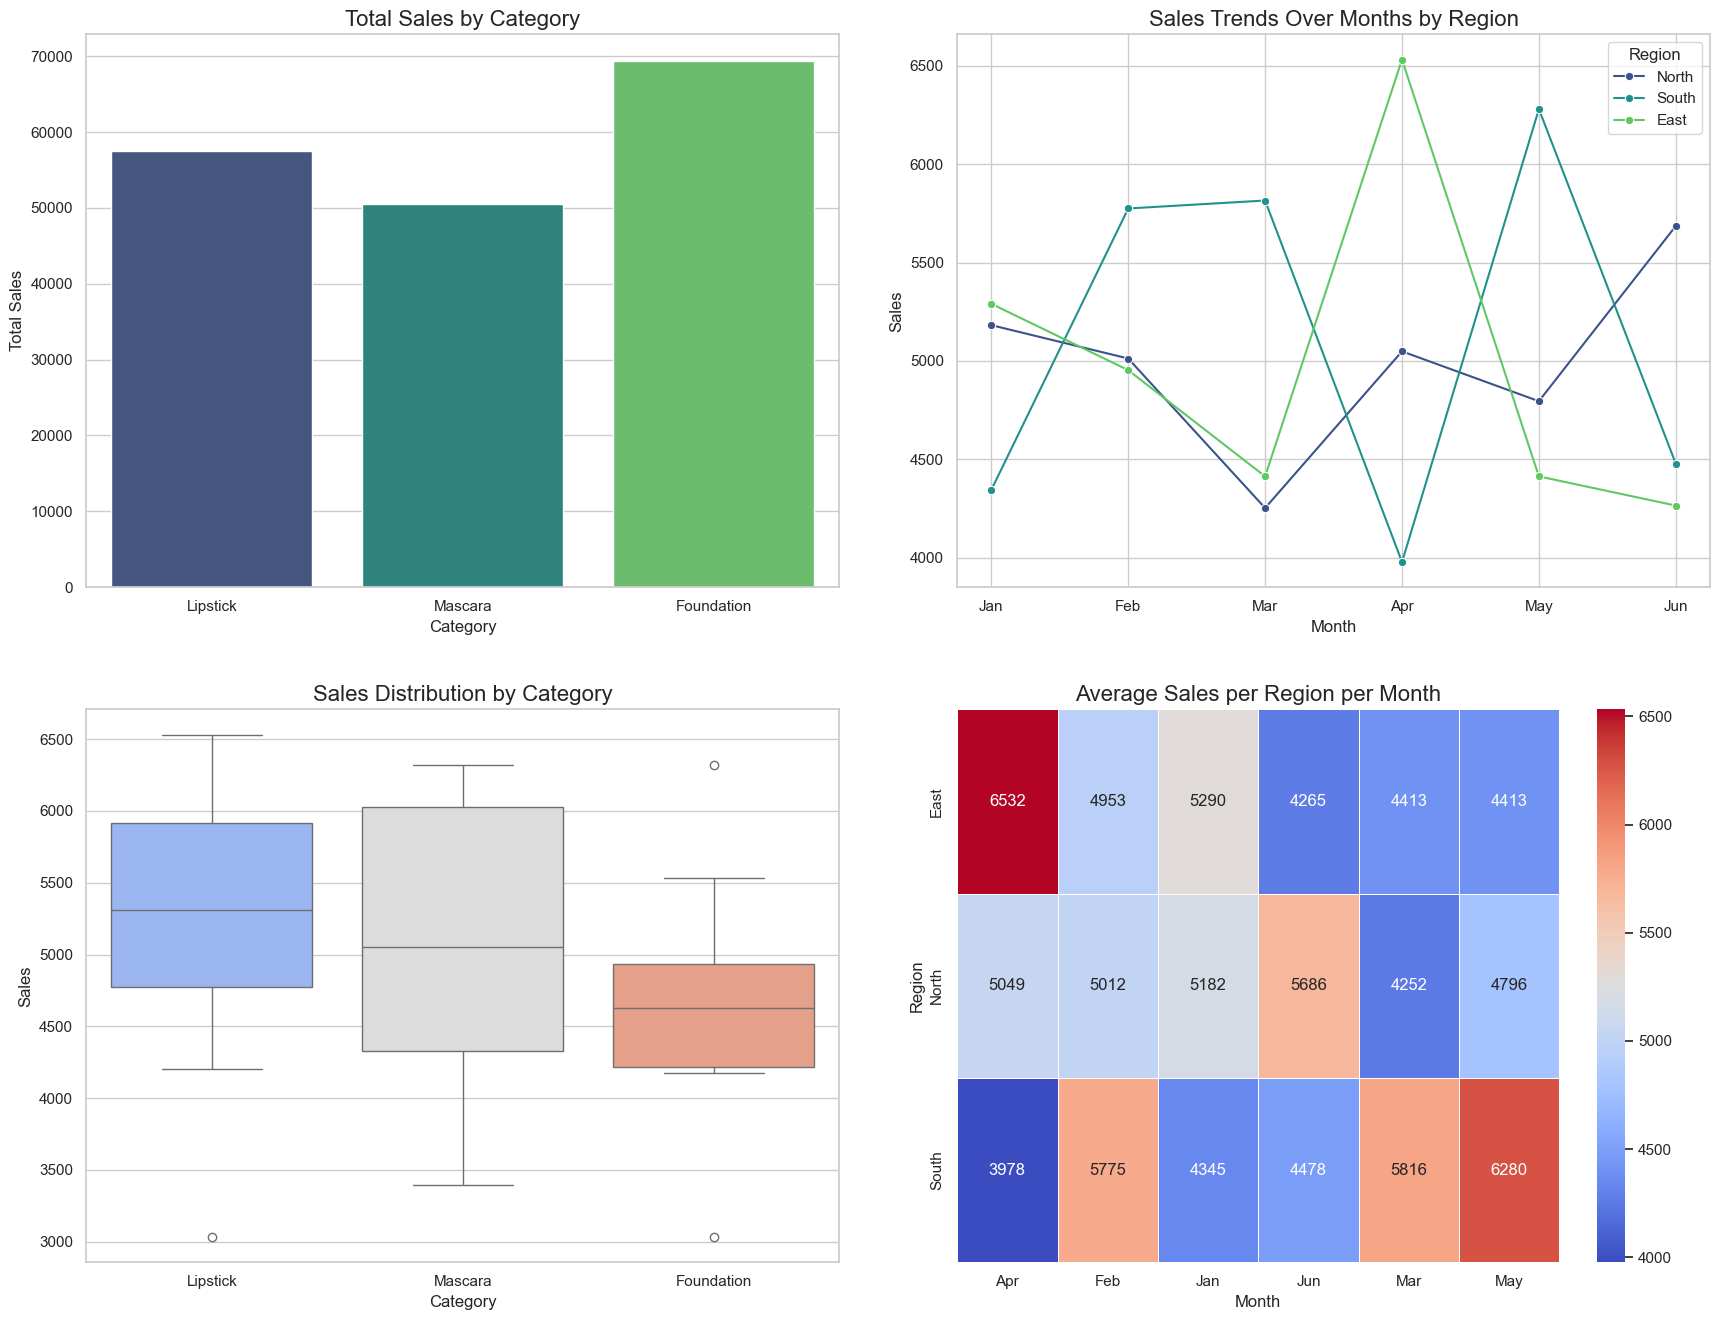

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set(style="whitegrid")

# Load the data
df = pd.read_csv('Makeup_Mancera.csv')

# Make a copy to show messy data
df_messy = df.copy()

print("************ Messy Data Sample ************")
print(df_messy.head(10))  # Show first 10 rows of the original messy data

# Clean the Data
df["Category"] = df["Category"].replace({"Mascarra": "Mascara", "Lip stick": "Lipstick"}) # Added replacement for 'Lip stick'
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Sales'] = df.groupby('Category')['Sales'].transform(lambda x: x.fillna(x.mean()))

print("\n************ Cleaned Data Sample ************")
print(df.head(10))  # Show first 10 rows of the cleaned data
print("\n")

# Create a temporary figure for saving
plt.figure(figsize=(10, 6))
line_chart = sns.lineplot(data=df, x='Month', y='Sales', hue='Region', marker='o', palette='plasma', errorbar=None)
plt.title('Sales Trends Over Months by Region', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)

# Annotate the highest sales month
monthly_total_sales = df.groupby('Month')['Sales'].sum().reset_index()
highest_sales_month = monthly_total_sales.loc[monthly_total_sales['Sales'].idxmax()]
plt.annotate(f"Highest: {highest_sales_month['Month']} ({highest_sales_month['Sales']:.0f})",
             xy=(highest_sales_month.name, highest_sales_month['Sales']), # Use index for x-coordinate
             xytext=(highest_sales_month.name, highest_sales_month['Sales'] + 100), # Use index for x-coordinate
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center', va='bottom', fontsize=10, color='red')


plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig("makeup_sales.png", dpi=300)
plt.close()


plt.figure(figsize=(18, 14))

#  Bar Chart: Total Sales by Category
plt.subplot(2, 2, 1)
sns.barplot(data=df, x='Category', y='Sales', estimator=sum, errorbar=None,
            hue='Category', palette='viridis', legend=False)
plt.title('Total Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')

#  Line Chart: Sales Trend by Region
plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='Month', y='Sales', hue='Region', marker='o', palette='viridis', errorbar=None)
plt.title('Sales Trends Over Months by Region', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)

# Annotate the highest sales month
monthly_total_sales = df.groupby('Month')['Sales'].sum().reset_index()
highest_sales_month = monthly_total_sales.loc[monthly_total_sales['Sales'].idxmax()]
plt.annotate(f"Highest: {highest_sales_month['Month']} ({highest_sales_month['Sales']:.0f})",
             xy=(highest_sales_month.name, highest_sales_month['Sales']),
             xytext=(highest_sales_month.name, highest_sales_month['Sales'] + 100),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center', va='bottom', fontsize=10, color='red')


plt.ticklabel_format(style='plain', axis='y')

#  Box Plot: Sales Distribution by Category
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Category', y='Sales', hue='Category', palette='coolwarm', legend=False,
            order=['Lipstick', 'Mascara', 'Foundation']) # Set the order here
plt.title('Sales Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')

#  Heatmap: Average Sales per Region per Month
plt.subplot(2, 2, 4)
pivot_table = df.pivot_table(index='Region', columns='Month', values='Sales', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm", linewidths=.5)
plt.title('Average Sales per Region per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Region', fontsize=12)

plt.tight_layout(pad=3.0)
plt.show()